# Stanford Child and Adult Checkerboard Retinotopy Dataset 

In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import sys
import os
import scipy
import os.path as osp
import matplotlib.pyplot as plt

sys.path.append('..')

from functions.visualization import retinotopic_map_plot
from deepRetinotopy_TheToolbox.utils.rois import ROI_WangParcelsPlusFovea as roi
from functions.evaluation import predicted_vs_empirical, return_list_of_subs, transform_polarangle
from ipywidgets import interact, Dropdown

## Visualize empirical and predicted maps

In [ ]:
path_to_freesurfer = '/BULK/LABDATA/openneuro/stanford-data/ds004440/derivatives/freesurfer/'
subject_id = os.listdir(path_to_freesurfer)
if 'processed' in subject_id:
    subject_id.remove('processed')
subject_id.sort()

prediction = Dropdown(options = ['empirical',
                                 'model'])
retinotopic_map = ['polarAngle', 'eccentricity', 'pRFsize']
binarize = Dropdown(options = [False, True])
hemisphere = Dropdown(options = ['lh', 'rh'])

@interact(subject_id=subject_id, prediction = prediction, 
          binarize = binarize, retinotopic_map = retinotopic_map,
          hemisphere = hemisphere)
def plot1(subject_id,prediction, binarize, retinotopic_map, hemisphere):
    return retinotopic_map_plot(subject_id, path_to_freesurfer, '../templates',
                                 prediction = prediction, binarize = binarize,
                                 retinotopic_map = retinotopic_map, hemisphere = hemisphere, dataset = 'nyu')

interactive(children=(Dropdown(description='subject_id', options=('sub-ACM07', 'sub-AD25', 'sub-AG10', 'sub-AI…

## Generate empirical vs. predicted values plots

Region of interest: earlyvisualcortex
Threshold: 0.1
0.7667660117149353


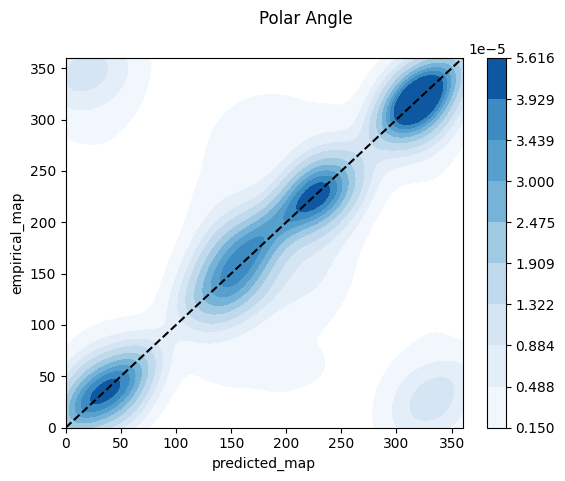

Threshold: 0.1
PearsonRResult(statistic=0.6399719457793803, pvalue=0.0)


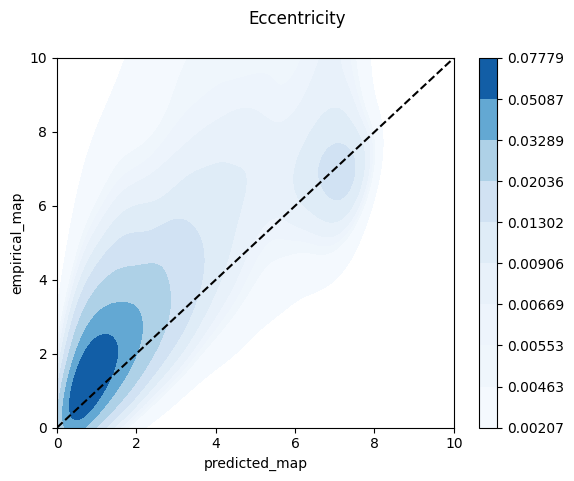

Threshold: 0.1
PearsonRResult(statistic=0.5564131867209795, pvalue=0.0)


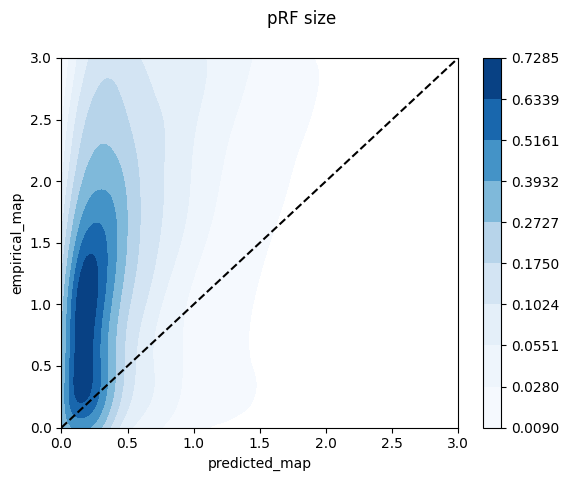

Region of interest: earlyvisualcortex
Threshold: 0.1
0.8494740128517151


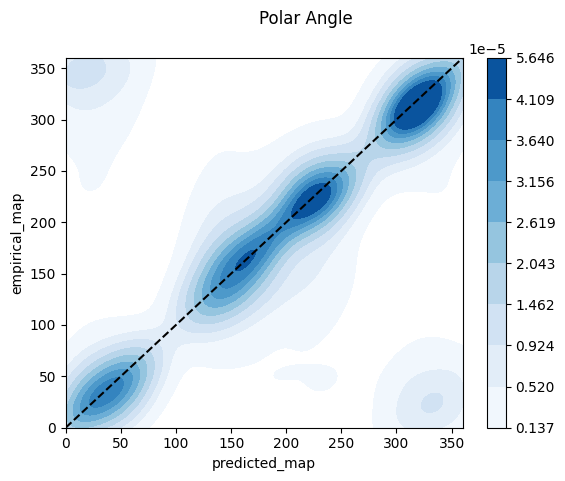

Threshold: 0.1
PearsonRResult(statistic=0.7072371311402129, pvalue=0.0)


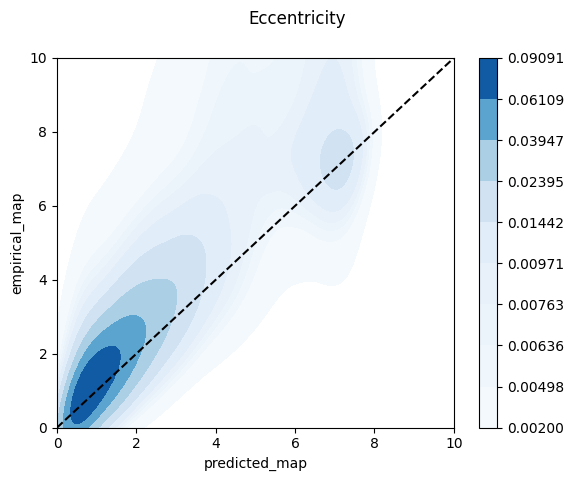

Threshold: 0.1
PearsonRResult(statistic=0.6215135929116056, pvalue=0.0)


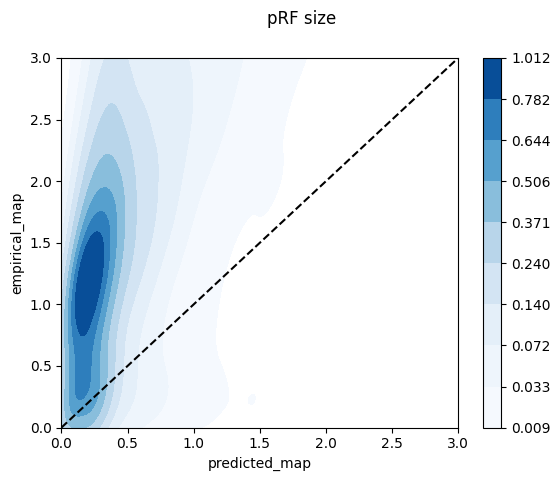

Region of interest: earlyvisualcortex
Threshold: 0.1
0.815399169921875


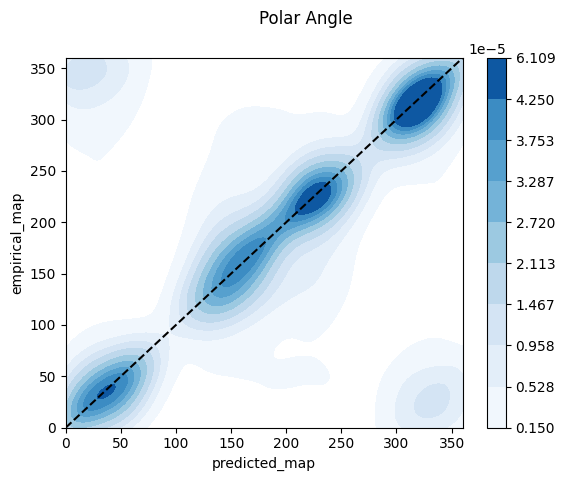

Threshold: 0.1
PearsonRResult(statistic=0.673794296759847, pvalue=0.0)


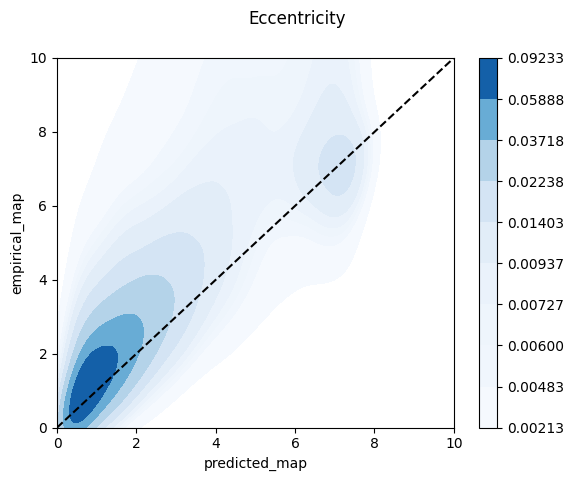

Threshold: 0.1
PearsonRResult(statistic=0.5870779246349529, pvalue=0.0)


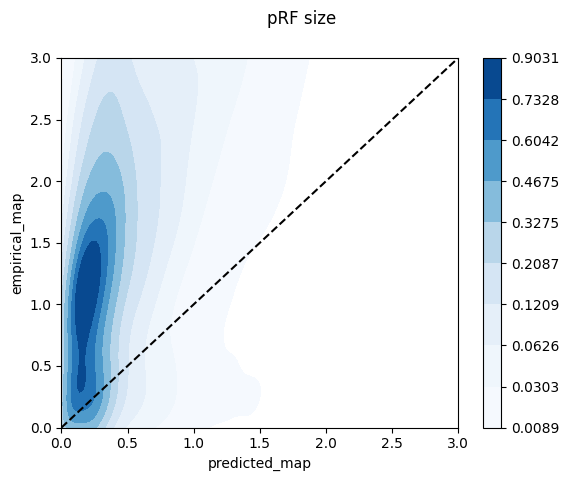

Region of interest: all
Threshold: 0.1
0.7039230465888977


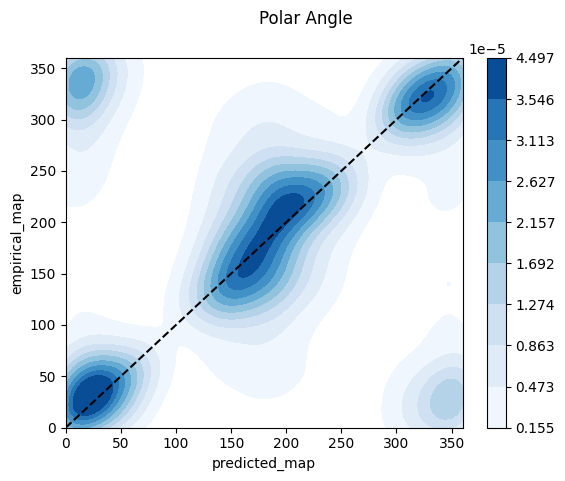

Threshold: 0.1
PearsonRResult(statistic=0.4365927258711663, pvalue=0.0)


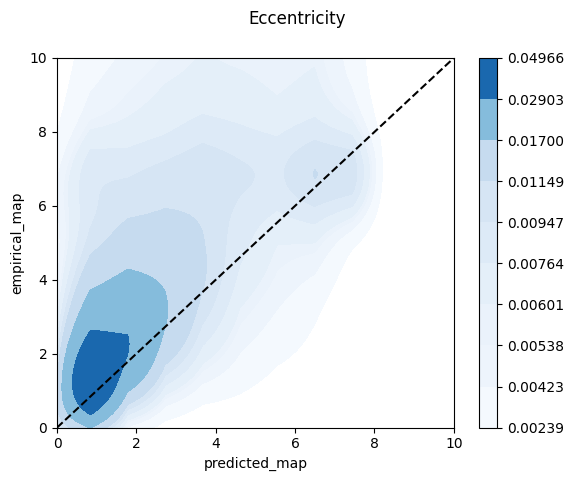

Threshold: 0.1
PearsonRResult(statistic=0.3764218365730508, pvalue=0.0)


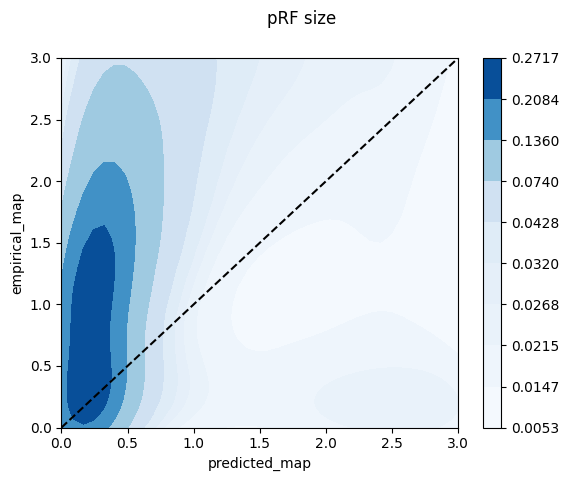

Region of interest: all
Threshold: 0.1
0.7846997380256653


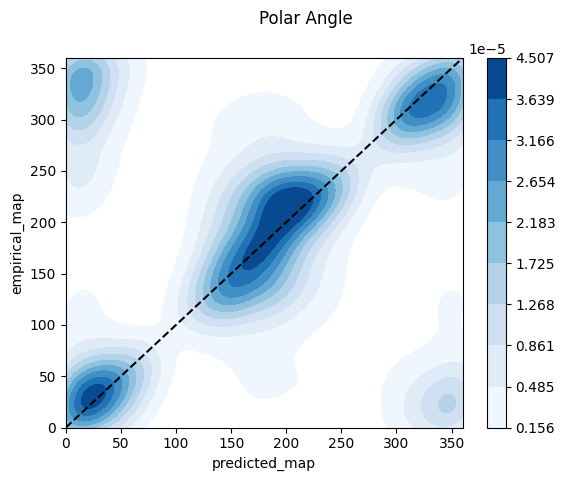

Threshold: 0.1
PearsonRResult(statistic=0.49656319381507724, pvalue=0.0)


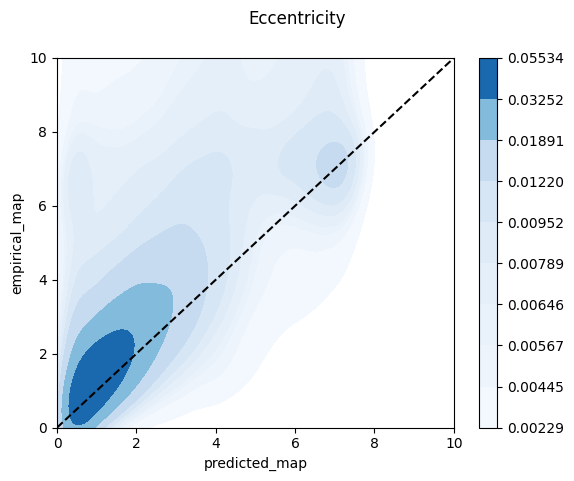

Threshold: 0.1
PearsonRResult(statistic=0.3992956047903481, pvalue=0.0)


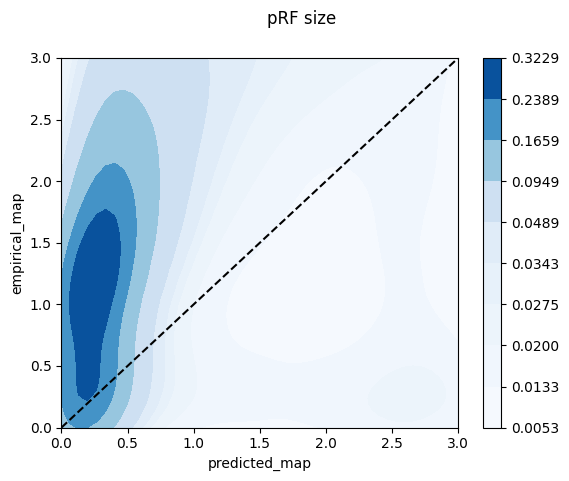

Region of interest: all
Threshold: 0.1
0.7593367099761963


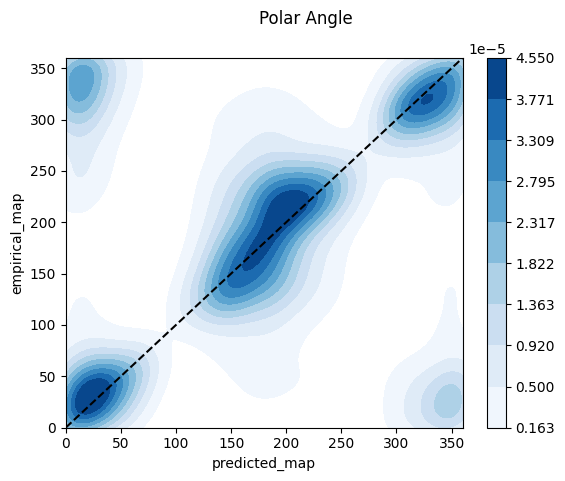

Threshold: 0.1
PearsonRResult(statistic=0.46591847612344056, pvalue=0.0)


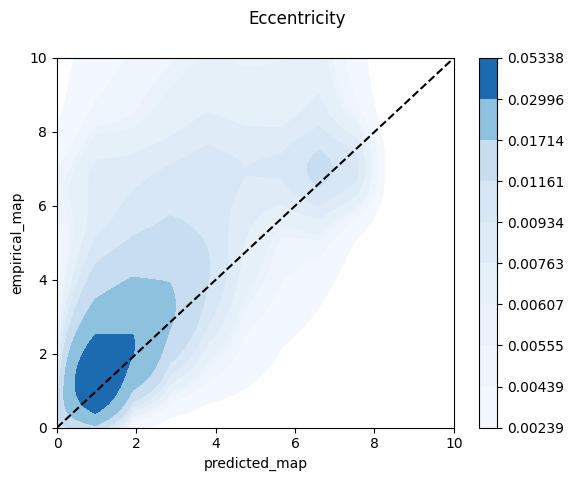

Threshold: 0.1


In [ ]:
dataset_name = 'stanford'
path = '/BULK/LABDATA/openneuro/stanford-data/ds004440/derivatives/freesurfer'
retinotopic_maps = ['polarAngle', 'eccentricity', 'pRFsize']

for hemispheres in ['both']:
    for threshold in [0.1]:
        for roi in ['earlyvisualcortex', 'all']:
            for participants_pool in ['children', 'adults', 'all']:
                predicted_vs_empirical(path, dataset_name, retinotopic_maps, hemispheres = hemispheres, 
                                       threshold=threshold, region_of_interest=roi, pool_of_participants=participants_pool)